# Manipulate time-series

The purpose of this document is to show how to easily access raw contract data, plus simple manipulation functions that you'd expect to find if you're trading future contracts (example: contract series stitching, term structure etc)

In [97]:
import trading.portfolio as portfolio
p = portfolio.Portfolio(instruments=config.portfolios.p_trade)
i = p.instruments

#### List all valid instruments available

Each value in the returned dictionary is one instance of `core.instrument.Instrument`

In [98]:
p.valid_instruments()

{'arabica': arabica,
 'aud': aud,
 'bobl': bobl,
 'bund': bund,
 'cattle': cattle,
 'cocoa': cocoa,
 'copper': copper,
 'corn': corn,
 'cotton': cotton,
 'crude': crude,
 'eur': eur,
 'eurodollar': eurodollar,
 'eurooat': eurooat,
 'eurostoxx': eurostoxx,
 'feeder': feeder,
 'gas': gas,
 'gbp': gbp,
 'gold': gold,
 'hsi': hsi,
 'leanhog': leanhog,
 'longbtp': longbtp,
 'mxp': mxp,
 'nasdaq': nasdaq,
 'nzd': nzd,
 'oats': oats,
 'pallad': pallad,
 'platinum': platinum,
 'robusta': robusta,
 'silver': silver,
 'smi': smi,
 'soybean': soybean,
 'soymeal': soymeal,
 'soyoil': soyoil,
 'sugar': sugar,
 'us2': us2,
 'us30': us30,
 'vix': vix,
 'vstoxx': vstoxx,
 'wheat': wheat,
 'yen': yen}

#### For each name we can see all contracts associated with each symbol

Columns are `OHLCV`. Index has two levels. First level is the contract name, second is a date.

In [99]:
i['robusta'].contracts().head()

close    high     low    open  volume
contract date                                              
199309   1993-09-01  1336.0  1338.0  1313.0  1320.0   560.0
         1993-09-02  1339.0  1345.0  1330.0  1332.0   300.0
         1993-09-03  1300.0  1330.0  1300.0  1330.0   287.0
         1993-09-06  1299.0  1318.0  1297.0  1318.0   210.0
         1993-09-07  1339.0  1355.0  1283.0  1295.0  1004.0

#### Getting all the data for a single contract.

Contracts are named after the expiration month in the following format YYYYMM. These names are integers.

In [100]:
i['robusta'].contracts().loc[201907].head()

,close,high,low,open,volume
date,,,,,
2018-01-17,1863.0,1830.0,1830.0,1830.0,4.0
2018-02-19,1835.0,1851.0,1851.0,1851.0,16.0
2018-02-22,1844.0,1847.0,1847.0,1847.0,20.0
2018-03-01,1846.0,1846.0,1846.0,1846.0,20.0
2018-03-02,1827.0,1829.0,1829.0,1829.0,2.0


#### Easy stitching

Our intruments know how to do Panama stitching: we do that by calling `panama_prices()`

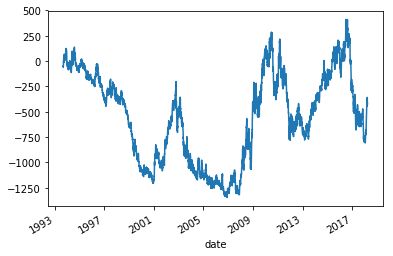

In [101]:
i['cocoa'].panama_prices().plot()
plt.show()

#### Market price of the stitched series

In [69]:
i['cocoa'].market_price().tail()

date        contract
2018-03-26  201809      1840.0
2018-03-27  201809      1795.0
2018-03-28  201809      1827.0
2018-03-29  201809      1789.0
2018-04-03  201809      1776.0
Name: close, dtype: float64

#### The stitching is done according to a roll progression that we can examine by calling `roll_progression()`:

In [102]:
i['cocoa'].roll_progression().head()

date
1960-03-01    196009
1960-03-02    196009
1960-03-03    196009
1960-03-04    196009
1960-03-05    196009
Freq: D, Name: contract, dtype: int64

#### Given one contract we can find the one after:

In [103]:
i['cocoa'].next_contract(199309)

199312

#### Compute a contract's term structure

In [104]:
i['cocoa'].term_structure()

,close,high,low,open,volume
contract,,,,,
201809,1776.0,1818.0,1755.0,1815.0,4688.0
201812,1776.0,1815.0,1758.0,1812.0,2697.0
201903,1766.0,1803.0,1747.0,1796.0,2026.0
201909,1779.0,1812.0,1809.0,1809.0,103.0
201912,1783.0,NaN,NaN,NaN,6.0
202003,1794.0,NaN,NaN,NaN,NaN


#### Find an expiry date

In [105]:
i['cocoa'].expiry_date(199309)

datetime.date(1993, 9, 15)

#### Compute a series of the next expiry date at each date

In [108]:
i['cocoa'].expiries().head()

date
1960-03-01   1960-09-15
1960-03-02   1960-09-15
1960-03-03   1960-09-15
1960-03-04   1960-09-15
1960-03-05   1960-09-15
Freq: D, Name: contract, dtype: datetime64[ns]

#### Compute a series of the number of days to the next expiry date, one of each date

In [109]:
i['cocoa'].time_to_expiry().head()

date
1960-03-01    198
1960-03-02    197
1960-03-03    196
1960-03-04    195
1960-03-05    194
Freq: D, dtype: int64

#### Compute forecasts.

The computed quantities are the ones defined in `config/strategy.py`

In [71]:
i['cocoa'].forecasts().head()

,ewmac8,ewmac16,ewmac32,ewmac64,carry
date,,,,,
1994-09-07,-7.298933,-3.923348,1.398090,3.150118,-8.423985
1994-09-08,-7.547778,-4.507797,0.857219,2.859416,-8.456492
1994-09-09,-7.201781,-4.762236,0.474475,2.636796,-8.491867
1994-09-12,-7.249737,-5.176379,0.009795,2.368496,-8.525330
1994-09-13,-6.903029,-5.359104,-0.341077,2.148404,-8.558792


#### Plot volumes

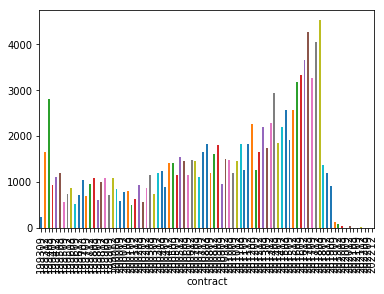

In [111]:
i['cocoa'].contract_volumes()